# Práctica 3: Aplicación de Business Intelligence y Minería de Datos

# 1. Carga y Exploración del Dataset

In [1]:
import os
import pandas as pd

# Leer todos los archivos de la carpeta 'emails'
ruta = "emails/"
documentos = []
nombres = []

for archivo in os.listdir(ruta):
    if archivo.endswith(".txt"):
        with open(os.path.join(ruta, archivo), 'r', encoding='utf-8', errors='ignore') as f:
            documentos.append(f.read())
            nombres.append(archivo)

df_original = pd.DataFrame({'archivo': nombres, 'contenido': documentos})
df_original.head()

,archivo,contenido
0,62c15d490d06be2313e5d4840c570dbf9095172e.txt,From: stssdxb@st.unocal.com (Dorin Baru)\nSubj...
1,5e2afa5a50c89fbdd863bd9851c978e6021d361a.txt,From: scott@psy.uwa.oz.au (Scott Fisher)\nSubj...
2,b244e3c38e9146ec260943784fa0c05bfec86503.txt,"From: abou@dam.cee.clarkson.edu (Abou Bakr,Dam..."
3,063e0232997ddffa9ad7648d4b0ab2778e9a026e.txt,From: noye@midway.uchicago.edu (vera shanti no...
4,01627f1c2797f307ee229359e54509470b0b647c.txt,From: ryan_cousineau@compdyn.questor.org (Ryan...


In [2]:
# copiamos del original para trabajar
df = df_original.copy()

In [3]:
# Backup de los datos a CSV para no estar leyendo los archivos cada vez, de necesitar
df.to_csv('emails.csv', index=False)

## 1.1 Cargar desde CSV

In [4]:
# Lectura desde CSV
import pandas as pd
df = pd.read_csv('emails.csv')
df.head()

,archivo,contenido
0,62c15d490d06be2313e5d4840c570dbf9095172e.txt,From: stssdxb@st.unocal.com (Dorin Baru)\nSubj...
1,5e2afa5a50c89fbdd863bd9851c978e6021d361a.txt,From: scott@psy.uwa.oz.au (Scott Fisher)\nSubj...
2,b244e3c38e9146ec260943784fa0c05bfec86503.txt,"From: abou@dam.cee.clarkson.edu (Abou Bakr,Dam..."
3,063e0232997ddffa9ad7648d4b0ab2778e9a026e.txt,From: noye@midway.uchicago.edu (vera shanti no...
4,01627f1c2797f307ee229359e54509470b0b647c.txt,From: ryan_cousineau@compdyn.questor.org (Ryan...


In [5]:
df

,archivo,contenido
0,62c15d490d06be2313e5d4840c570dbf9095172e.txt,From: stssdxb@st.unocal.com (Dorin Baru)\nSubj...
1,5e2afa5a50c89fbdd863bd9851c978e6021d361a.txt,From: scott@psy.uwa.oz.au (Scott Fisher)\nSubj...
2,b244e3c38e9146ec260943784fa0c05bfec86503.txt,"From: abou@dam.cee.clarkson.edu (Abou Bakr,Dam..."
3,063e0232997ddffa9ad7648d4b0ab2778e9a026e.txt,From: noye@midway.uchicago.edu (vera shanti no...
4,01627f1c2797f307ee229359e54509470b0b647c.txt,From: ryan_cousineau@compdyn.questor.org (Ryan...
...,...,...
18823,6776113c81aa0c84c5bb034c04ee728886fd1090.txt,From: aa963@Freenet.carleton.ca (Lloyd Carr)\n...
18824,5135265855b2095b28f1b35e4f6bd924707f3605.txt,From: d88-jwa@hemul.nada.kth.se (Jon Wtte)\nSu...
18825,a1c3a74ca2b2eeaddb0e6eccdc84bf0f2514c613.txt,From: rboudrie@wpi.WPI.EDU (Robert A. Boudrie)...
18826,74041c0f675427f06b4f3f1e4da8b261f2243aee.txt,From: mmaser@engr.UVic.CA (Michael Maser)\nSu...


## 1.2. Exploración Inicial

In [6]:
# Número total de documentos
print(f"Número total de documentos: {len(df)}")

# Longitud promedio
df['longitud'] = df['contenido'].apply(len)
print(f"Longitud promedio del texto: {df['longitud'].mean():.2f}")

# Ejemplos de textos
df['contenido'].sample(3).values

Número total de documentos: 18828
Longitud promedio del texto: 1801.11


array(['From: gld@cunixb.cc.columbia.edu (Gary L Dare)\nSubject: Re: Schedule...\n\nmre@teal.Eng.Sun.COM (Mike Eisler) writes:\n>gld@cunixb.cc.columbia.edu (Gary L Dare) writes:\n>>I can\'t believe that ESPN is making SportsChannel America look good.\n>\n>But only in NY,NJ, Philadelphia, and Chicago. Everywhere else, the only\n>reason SportsChannel was available was for local baseball broadcasts.\n\nYes, a point well-taken ... however, even in areas that finally got\nsome games, there\'s something nagging in the back of your skull when\nthe network that has the national rights in its pocket says on its\nsports news, "There\'s an awesome overtime going on in Quebec City,\nand we\'ll *try* to get you an update through the show ..." when you\nknow that it\'s on a satellite\'s feedhorn somewhere up there ...\n\n>If people want hockey on TV, they should watch hockey on TV. I bet \n>the ratings for hockey on Sunday on ABC went into the toilet. \n\nFrom today\'s Times, ABC got great ratings i

In [7]:
# dividimos en columnas para tener el compo body limpio
import re

def parse_email(texto):
    # Extraer campo From
    match_from = re.search(r'^From:\s*(.*)', texto, re.MULTILINE)
    from_ = match_from.group(1).strip() if match_from else None

    # Extraer campo Subject
    match_subject = re.search(r'^Subject:\s*(.*)', texto, re.MULTILINE)
    subject = match_subject.group(1).strip() if match_subject else None

    # Determinar si es respuesta
    es_respuesta = subject.lower().startswith("re:") if subject else False

    # Eliminar encabezados (todo hasta la primera línea vacía)
    body = re.split(r'\n\s*\n', texto, maxsplit=1)
    body = body[1].strip() if len(body) > 1 else texto

    # Eliminar la firma antes de buscar citas
    body_limpio = re.split(r'\n--\s*\n', body)[0]  # toma solo lo que está antes de la firma (en correos antiguos -- separa la firma)

    # 5. Dividir el cuerpo en líneas
    lineas = body_limpio.splitlines()

    # 6. Marcar si cada línea es una cita (empieza con al menos un '>')
    patrones_omitir = [
        r'other stuff deleted',
        r'text omitted',
        r'message removed',
        r'content skipped',
    ]
    niveles_cita = []
    for linea in lineas:
        m = re.match(r'^(>+)', linea)
        if m:
            contenido = linea[m.end():].strip()
            simbolos = sum(1 for c in contenido if not c.isalnum())
            letras = sum(1 for c in contenido if c.isalnum())

            es_decorativa = (
                letras < 5 or
                simbolos > letras or
                len(contenido.split()) < 3 or
                any(re.search(pat, contenido, re.IGNORECASE) for pat in patrones_omitir)
            )

            if not es_decorativa:
                niveles_cita.append(len(m.group(1)))
            else:
                niveles_cita.append(0)
        else:
            niveles_cita.append(0)


    # 7. ¿El correo tiene al menos una cita?
    tiene_cita = any(n > 0 for n in niveles_cita)

    # 8. Nivel máximo de citas encontradas
    nivel_maximo_cita = max(niveles_cita) if niveles_cita else 0

    return pd.Series([from_, subject, es_respuesta, body, tiene_cita, nivel_maximo_cita])

# Aplicamos al DataFrame original
df[['from', 'subject', 'es_respuesta', 'body', 'tiene_cita', 'nivel_maximo_cita']] = df['contenido'].apply(parse_email)
df = df.drop(columns=['contenido'])  # opcional podemos quitar el contenido
df.head()


,archivo,longitud,from,subject,es_respuesta,body,tiene_cita,nivel_maximo_cita
0,62c15d490d06be2313e5d4840c570dbf9095172e.txt,1701,stssdxb@st.unocal.com (Dorin Baru),Re: was:Go Hezbollah!,True,"(Brad Hernlem writes:\n\n\n>Well, you should h...",True,1
1,5e2afa5a50c89fbdd863bd9851c978e6021d361a.txt,1560,scott@psy.uwa.oz.au (Scott Fisher),Re: Manual Shift Bigots,True,jahonen@cc.lut.fi (Jarmo Ahonen) writes:\n\n>k...,True,2
2,b244e3c38e9146ec260943784fa0c05bfec86503.txt,1535,"abou@dam.cee.clarkson.edu (Abou Bakr,Damon 317...",Re: Forsale and Wanted (HD/Fax/Typewriter),True,From article <1pf5qe$b3b@seven-up.East.Sun.COM...,True,1
3,063e0232997ddffa9ad7648d4b0ab2778e9a026e.txt,2581,noye@midway.uchicago.edu (vera shanti noyes),Re: Am I going to Hell?,True,In article <Apr.24.01.09.10.1993.4254@geneva.r...,True,1
4,01627f1c2797f307ee229359e54509470b0b647c.txt,3429,ryan_cousineau@compdyn.questor.org (Ryan Cousi...,Boom! Dog attack!,False,My previous posting on dog attacks must have g...,False,0


Distribución de correos que son respuesta (Re:):
es_respuesta
True     12350
False     6478
Name: count, dtype: int64

Porcentaje de correos que contienen al menos una cita: 50.19%
numero minimo de citas 0
numero maximo de citas 6


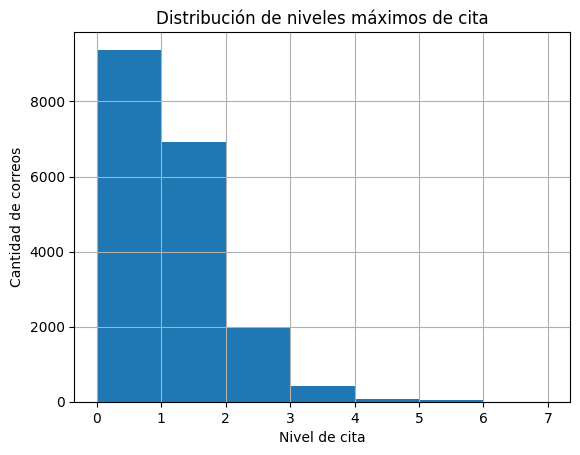

In [8]:
# Distribución de respuestas
print("Distribución de correos que son respuesta (Re:):")
print(df['es_respuesta'].value_counts())

# Correos que contienen citas
print(f"\nPorcentaje de correos que contienen al menos una cita: {df['tiene_cita'].mean() * 100:.2f}%")

print(f"numero minimo de citas",df['nivel_maximo_cita'].min())
print(f"numero maximo de citas",df['nivel_maximo_cita'].max())

# Histograma del nivel máximo de cita
import matplotlib.pyplot as plt

df['nivel_maximo_cita'].hist(bins=range(0, df['nivel_maximo_cita'].max()+2))
plt.title("Distribución de niveles máximos de cita")
plt.xlabel("Nivel de cita")
plt.ylabel("Cantidad de correos")
plt.show()

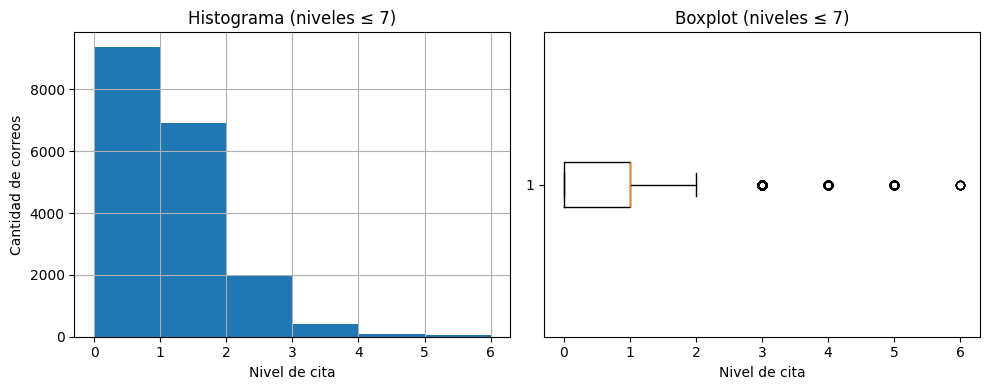

In [9]:
import matplotlib.pyplot as plt

# Filtrar niveles razonables (e.g. hasta 7)
niveles_filtrados = df[df['nivel_maximo_cita'] <= 7]['nivel_maximo_cita']

plt.figure(figsize=(10, 4))

# Histograma
plt.subplot(1, 2, 1)
niveles_filtrados.hist(bins=range(0, 7))
plt.title("Histograma (niveles ≤ 7)")
plt.xlabel("Nivel de cita")
plt.ylabel("Cantidad de correos")

# Boxplot
plt.subplot(1, 2, 2)
plt.boxplot(niveles_filtrados, vert=False)
plt.title("Boxplot (niveles ≤ 7)")
plt.xlabel("Nivel de cita")

plt.tight_layout()
plt.show()


# 2. Preprocesamiento de Texto

Agregamos libreria NLTK que es una libreria con lenguaje humano que nos ayudara a analizar texto, y tqdm para barras de progreso
- escogimos stemming que se trata de reducir una palabra a raiz dado que ya viene von nltk y tiene muy buen performance con grandes cantidades de datos

In [10]:
!pip install nltk tqdm

Defaulting to user installation because normal site-packages is not writeable


In [11]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize

nltk.download('punkt') # un tokenizador pre-entrenado.
nltk.download('stopwords') # identificador se refiere a una lista de palabras vacías (stopwords) en varios idiomas
nltk.download('punkt_tab') # identificador se refiere a un modelo adicional para el tokenizador "punkt"

stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer("english")

def limpiar_texto(texto):
    texto = texto.lower() # ponemos en minusculas
    tokens = word_tokenize(texto) # dividimos en palabras individuales
    tokens = [t for t in tokens if t.isalpha()] # filtramos - solo texto
    tokens = [t for t in tokens if t not in stop_words] # quitamos - palabras muy comunes que no aportan significado como "el", "la", "y"
    tokens = [stemmer.stem(t) for t in tokens] # aplicacmos stemming - reducimos las palabras a su raíz (por ejemplo: "jugando" → "jug")
    return " ".join(tokens)

df['texto_limpio'] = df['body'].apply(limpiar_texto)
df[['archivo', 'texto_limpio']].head()


[nltk_data] Downloading package punkt to /home/gaston/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/gaston/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/gaston/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,archivo,texto_limpio
0,62c15d490d06be2313e5d4840c570dbf9095172e.txt,brad hernlem write well note cheer attack isra...
1,5e2afa5a50c89fbdd863bd9851c978e6021d361a.txt,jahonen jarmo ahonen write kissan john kissan ...
2,b244e3c38e9146ec260943784fa0c05bfec86503.txt,articl jorg jorg lach sun bos hardwar look buy...
3,063e0232997ddffa9ad7648d4b0ab2778e9a026e.txt,articl stoney stanley toney write muslim fear ...
4,01627f1c2797f307ee229359e54509470b0b647c.txt,previous post dog attack must generat bad karm...


# 3. Vectorización del Texto (TF-IDF)

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Creamos el vectorizador TF-IDF
# - max_df=0.8: ignora palabras que aparecen en más del 80% de los documentos (poco informativas)
# - min_df=5: ignora palabras que aparecen en menos de 5 documentos (poco relevantes o ruido)
vectorizador_tfidf = TfidfVectorizer(max_df=0.8, min_df=5)
X = vectorizador_tfidf.fit_transform(df['texto_limpio']) # aplica la vectorizacion

# Mostramos la forma (shape) de la matriz resultante:
# - filas = número de documentos
# - columnas = número de términos únicos seleccionados
print(f"Shape del TF-IDF: {X.shape}")


Shape del TF-IDF: (18828, 18680)


# 4 - Análisis de Clustering:  Clustering No Supervisado (K-Means)

In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm # para barra de progreso

# Listas para guardar resultados
inertia = []       # Inercia de cada modelo KMeans
sil_scores = []    # Puntuación Silhouette
K = list(range(2, 11))   # Rango de valores de k a evaluar

# Iteramos sobre distintos valores de k
for k in tqdm(K, desc="Evaluando valores de k"):
    kmeans = KMeans(n_clusters=k, random_state=42)  # Crear modelo con k clusters
    kmeans.fit(X)                                   # Ajustar modelo al conjunto TF-IDF
    inertia.append(kmeans.inertia_)                 # Guardar la inercia
    sil_scores.append(silhouette_score(X, kmeans.labels_))  # Guardar Silhouette Score


Evaluando valores de k:   0%|          | 0/9 [00:00<?, ?it/s]

# 5 - Estimación del número óptimo de clusters

Aplicamos Elbow method y Silhouette

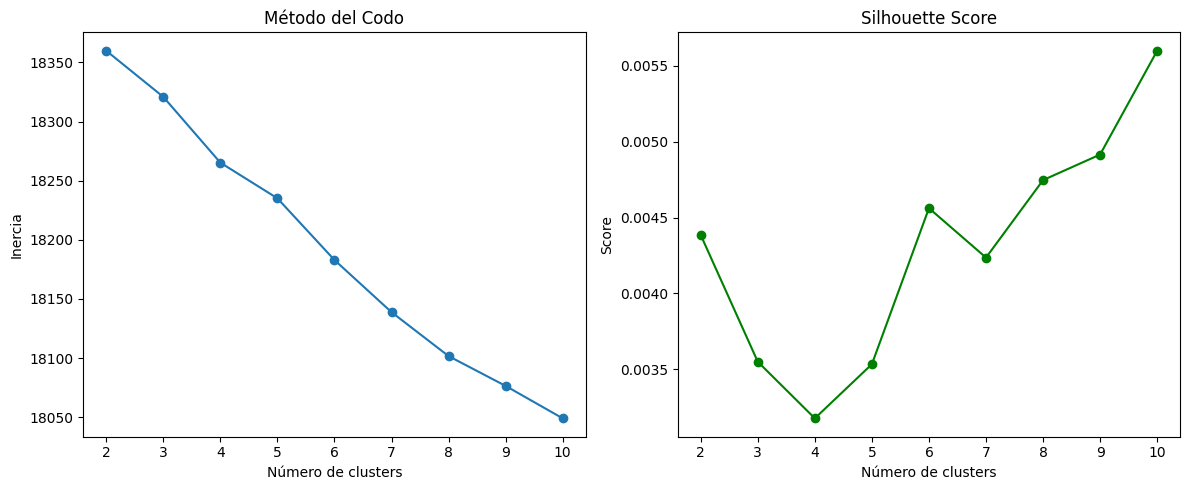

In [14]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(K, inertia, marker='o')
plt.title("Método del Codo")
plt.xlabel("Número de clusters")
plt.ylabel("Inercia")

plt.subplot(1, 2, 2)
plt.plot(K, sil_scores, marker='o', color='green')
plt.title("Silhouette Score")
plt.xlabel("Número de clusters")
plt.ylabel("Score")

plt.tight_layout()
plt.show()

## 5.1 - Aplicación Final del Modelo

Basado en el método del codo y el Silhouette Score podemos ver que el número de clusters adecuado se encuentra entre 6 y 10, siendo 7 un buen punto de equilibrio entre simplicidad del modelo y separación de los grupos. Entonces usaremos "k=7"

In [15]:
# Elegimos el mejor k (por ejemplo, k=7 basado en los gráficos)
modelo_final = KMeans(n_clusters=7, random_state=42)

# Ajustar el modelo y asignar los clusters al DataFrame
df['cluster'] = modelo_final.fit_predict(X)

# Ver ejemplos por cluster
for c in sorted(df['cluster'].unique()):
    print(f"\n--- Ejemplos del Cluster {c} ---")
    print(df[df['cluster'] == c]['body'].sample(1).values[0][:500]) # Muestra 1 ejemplo (primeros 500 caracteres)



--- Ejemplos del Cluster 0 ---
IRWIN suggests the use of pre-formatted tapes for their tape drives, as
you often can't successfully format a tape and need  bulk-erase it before
you can format it again. Anyway, I have some new, preformatted tapes for
IRWIN 250 tape drives. 
IRWIN accuTRAK series 120-250MB, $16/ea. New never used.
3M DC2120, RHOMAT Format.  $16/ea. Wraped.

Email if interested.

Feng
--
   The opinions expressed are not necessarily those of the University of
     North Carolina at Chapel Hill, the Campus Office

--- Ejemplos del Cluster 1 ---
In article <1993Apr21.163929.21149@eff.org> A. Charles Gross <acg@eff.org> writes:
>Certainly, with our way-cool Internet powers of
>organization, we can act in the same way, if such action is appropriate.
>
>As long as we are kept informed of events, anyone on this bboard can make
>a call to action.  Hopefully, we're a strong enough community to act on
>those calls.  I realize this is a little optomistic, and I'm glad EFF is
>work

# 7. Reducción de Dimensionalidad y Visualización (opcional)

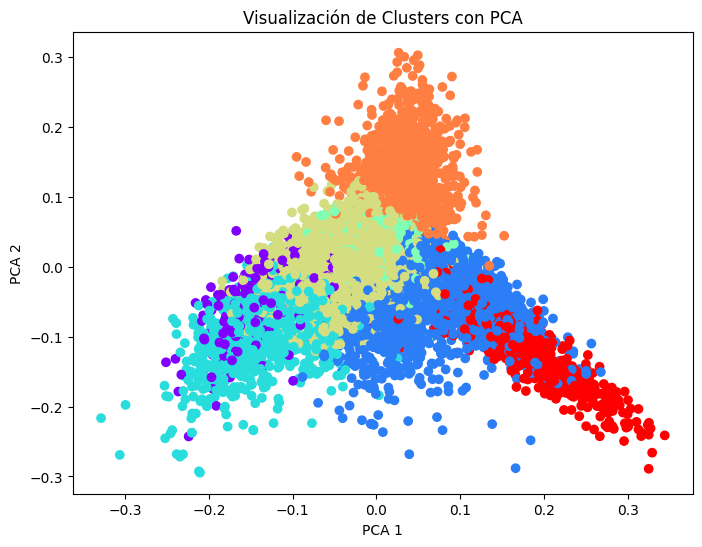

In [16]:
from sklearn.decomposition import PCA  # Importa PCA para reducción de dimensionalidad

# Crear el modelo PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)

# Aplicar PCA al conjunto de datos (convertido a array denso)
X_pca = pca.fit_transform(X.toarray())

# Crear figura para graficar
plt.figure(figsize=(8,6))

# Graficar los documentos en 2D, coloreados por su cluster
plt.scatter(X_pca[:,0], X_pca[:,1], c=df['cluster'], cmap='rainbow')

# Títulos y etiquetas del gráfico
plt.title("Visualización de Clusters con PCA")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")

# Mostrar la figura
plt.show()

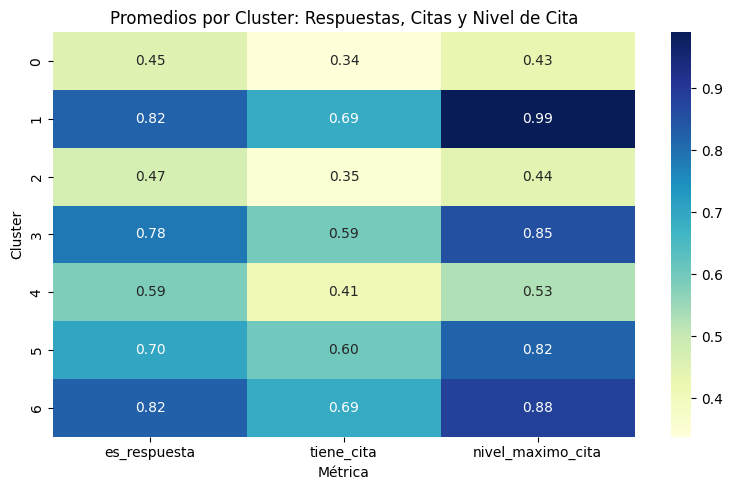

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Agrupar por cluster y calcular el promedio de las métricas clave
resumen_clusters = df.groupby('cluster')[['es_respuesta', 'tiene_cita', 'nivel_maximo_cita']].mean()

# Crear el heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(resumen_clusters, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Promedios por Cluster: Respuestas, Citas y Nivel de Cita")
plt.ylabel("Cluster")
plt.xlabel("Métrica")
plt.tight_layout()
plt.show()


In [18]:
for c in sorted(df['cluster'].unique()):
    print(f"\n--- Cluster {c} ---")
    print(df[df['cluster'] == c]['subject'].sample(3).values)  # o ['body']



--- Cluster 0 ---
['Hard disk error' 'Re: cd300 question'
 'Re: Can I put a 1.44 floppy in an SE?']

--- Cluster 1 ---
['Re: WACO burning'
 'Re: Clinton wants National ID card, aka USSR-style "Internal Passport"'
 'Re: New Encryption Algorithm']

--- Cluster 2 ---
['Help on xlib and include files' 'Re: Xt intrinsics: slow popups'
 'Re: Need help with WP for Windows']

--- Cluster 3 ---
['Re: wife wants convertible' 'Re: Re: Toyota Land Cruiser worth it?'
 'Re: Hard Copy --- Hot Pursuit!!!!']

--- Cluster 4 ---
['disabling all power management interrupts'
 'Re: Power, signal surges in home...'
 'Re: So, do any police ossifers read this stuff?']

--- Cluster 5 ---
['Observations' 'Re: Thumbs up to ESPN'
 'Re: USENET Hockey Draft Final Standings']

--- Cluster 6 ---
['Re: Mormon Temples' 'Re: Reason vs. Revelation'
 'Re: The doctrine of Original Sin']
